## 1. Import Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Statistical Models
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

## 2. Dataset Information

In [2]:
df = pd.read_csv('Flights_delay_data.csv')
df.sample(5)

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
5877      11            18            1                DL   N811DZ  LAS   
14263     12            16            1                DL   N340NB  MSP   
21946      1            10            5                DL   N342NB  TPA   
7337      11            23            6                B6   N375JB  BTV   
8605      11            27            3                DL   N342NB  BOS   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  \
5877          -2               364      2248       1229  ...         40   
14263         -4               197      1029        975  ...         23   
21946         25               177      1005        705  ...         41   
7337          -7                75       266        455  ...         23   
8605          -7                80       187        420  ...         45   

       Humidity  Wind Wind Speed  Wind Gust Pressure      Condition  sch_dep  \
5877         10   NNW          7          0    29.72     Light Rain       28   
14263        59   NNE          3          0    30.23  Mostly Cloudy       31   
21946        83   WSW          5          0    30.48  Mostly Cloudy       20   
7337         57     W          8          0    30.06           Fair       33   
8605         96   ENE          3          0    30.02         Cloudy       17   

       sch_arr TAXI_OUT  
5877        44       22  
14263       33       20  
21946       29       24  
7337        29       14  
8605        20       20  

[5 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
df.isnull().sum().sum()

np.int64(2)

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print("No. of Unique Values in Each Column\n")
for col in df.columns:
    print(f"{col:<20} {df[col].nunique()}")

No. of Unique Values in Each Column

MONTH                3
DAY_OF_MONTH         31
DAY_OF_WEEK          7
OP_UNIQUE_CARRIER    9
TAIL_NUM             2092
DEST                 65
DEP_DELAY            342
CRS_ELAPSED_TIME     327
DISTANCE             64
CRS_DEP_M            606
DEP_TIME_M           1240
CRS_ARR_M            970
Temperature          51
Dew Point            64
Humidity             78
Wind                 18
Wind Speed           30
Wind Gust            28
Pressure             149
Condition            25
sch_dep              56
sch_arr              47
TAXI_OUT             37


In [8]:
df.drop(columns=["TAIL_NUM"], inplace=True)

In [9]:
df[["CRS_ELAPSED_TIME", "CRS_DEP_M", "DEP_TIME_M", "CRS_ARR_M"]].sample(5)

CRS_ELAPSED_TIME  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M
8304                181        485         477        666
22118               125       1259        1256       1384
24492               392        700         698        912
17185               200        675         670        815
19790                81       1010        1009       1091

In [10]:
# Processing CRS_DEP_M into minutes after midnight
df['CRS_DEP_M'] = df['CRS_DEP_M'].astype(str).str.zfill(4)
df['CRS_DEP_M'] = df['CRS_DEP_M'].apply(lambda x: int(x[:2]) * 60 + int(x[2:]))

# Processing DEP_TIME_M into minutes after midnight
df['DEP_TIME_M'] = df['DEP_TIME_M'].astype(str).str.zfill(4)
df['DEP_TIME_M'] = df['DEP_TIME_M'].apply(lambda x: int(x[:2]) * 60 + int(x[2:]))

# Processing CRS_ARR_M into minutes after midnight
df['CRS_ARR_M'] = df['CRS_ARR_M'].astype(str).str.zfill(4)
df['CRS_ARR_M'] = df['CRS_ARR_M'].apply(lambda x: int(x[:2]) * 60 + int(x[2:]))

In [11]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M',
       'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [12]:
df.sample(5)

MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER DEST  DEP_DELAY  \
8297      11            26            2                B6  FLL         -7   
19564      1             2            4                B6  LAX          7   
11564     12             7            6                AA  LAX         -3   
15323     12            20            5                DL  DTW         -5   
25628      1            22            3                B6  FLL         91   

       CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  ...  Dew Point  \
8297                187      1069        320         313  ...         46   
19564               391      2475        840         847  ...         37   
11564               394      2475        720         757  ...         16   
15323               124       509        500         495  ...         13   
25628               193      1069        389         440  ...         19   

       Humidity Wind  Wind Speed Wind Gust  Pressure      Condition  sch_dep  \
8297         90  SSW          10         0     30.03  Partly Cloudy       37   
19564        80    S           6         0     29.87  Mostly Cloudy       18   
11564        50  NNW          15        28     30.47           Fair       41   
15323        42  NNW          15         0     30.53           Fair       23   
25628        52    S           8         0     30.44           Fair       22   

      sch_arr  TAXI_OUT  
8297       32        13  
19564      34        15  
11564      29        13  
15323      25        13  
25628      28        25  

[5 rows x 22 columns]

In [13]:
categorical_cols = ['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']
numerical_cols = [_ for _ in df.columns if _ not in categorical_cols]

print("Categorical Columns\n")
print(categorical_cols)
print(len(categorical_cols))

print("\nNumerical Columns\n")
print(numerical_cols)
print(len(numerical_cols))

Categorical Columns

['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']
6

Numerical Columns

['DAY_OF_MONTH', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT']
16


In [14]:
df['Dew Point'] = df['Dew Point'].astype(np.float64)

## 3. Data Visulaization

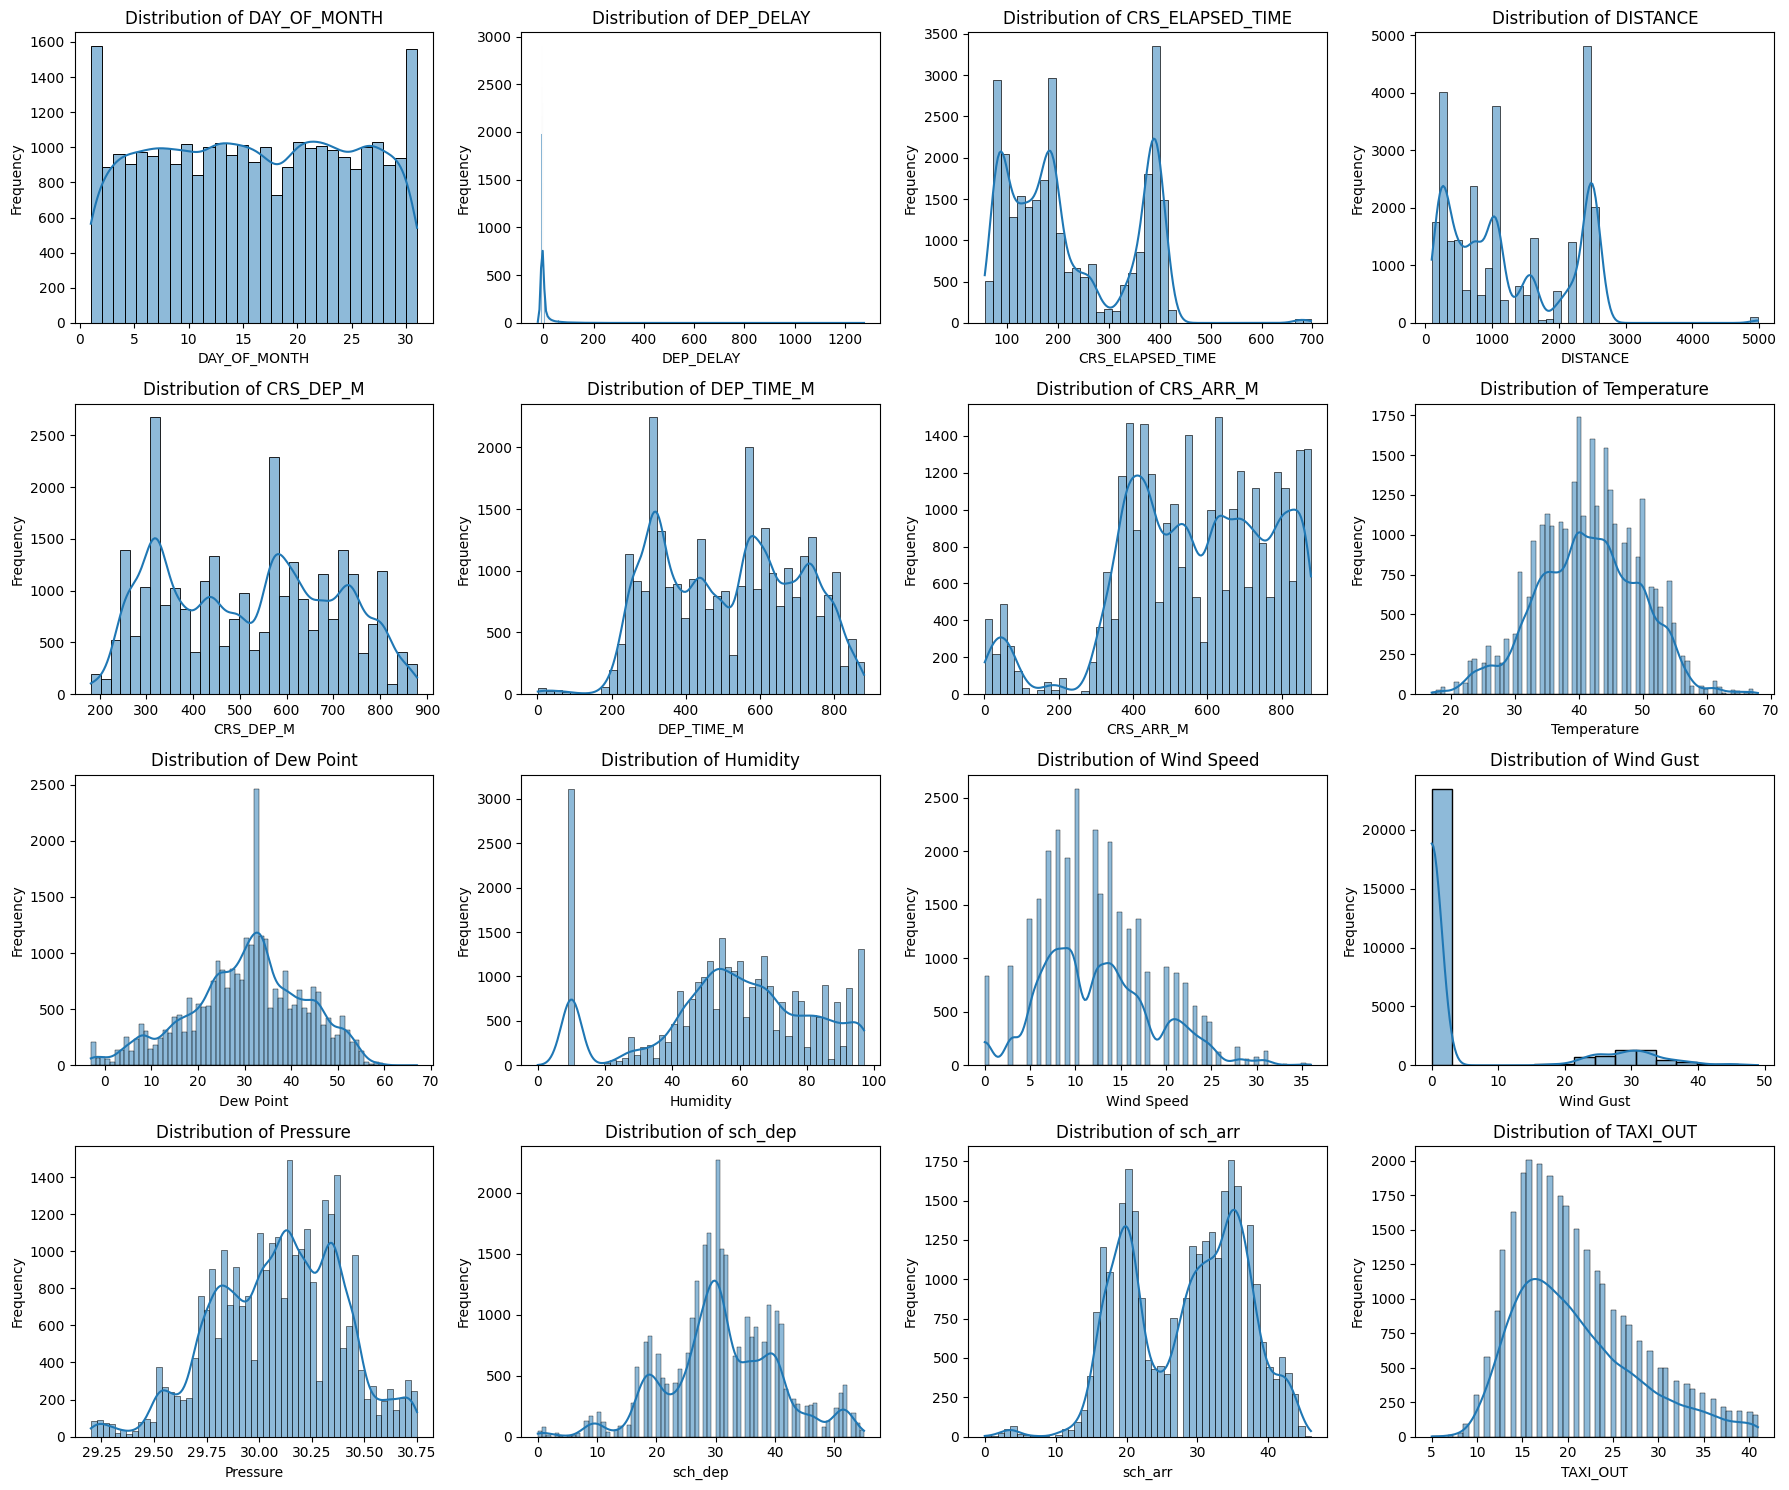

In [15]:
# Visualizing the distribution of numerical features
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

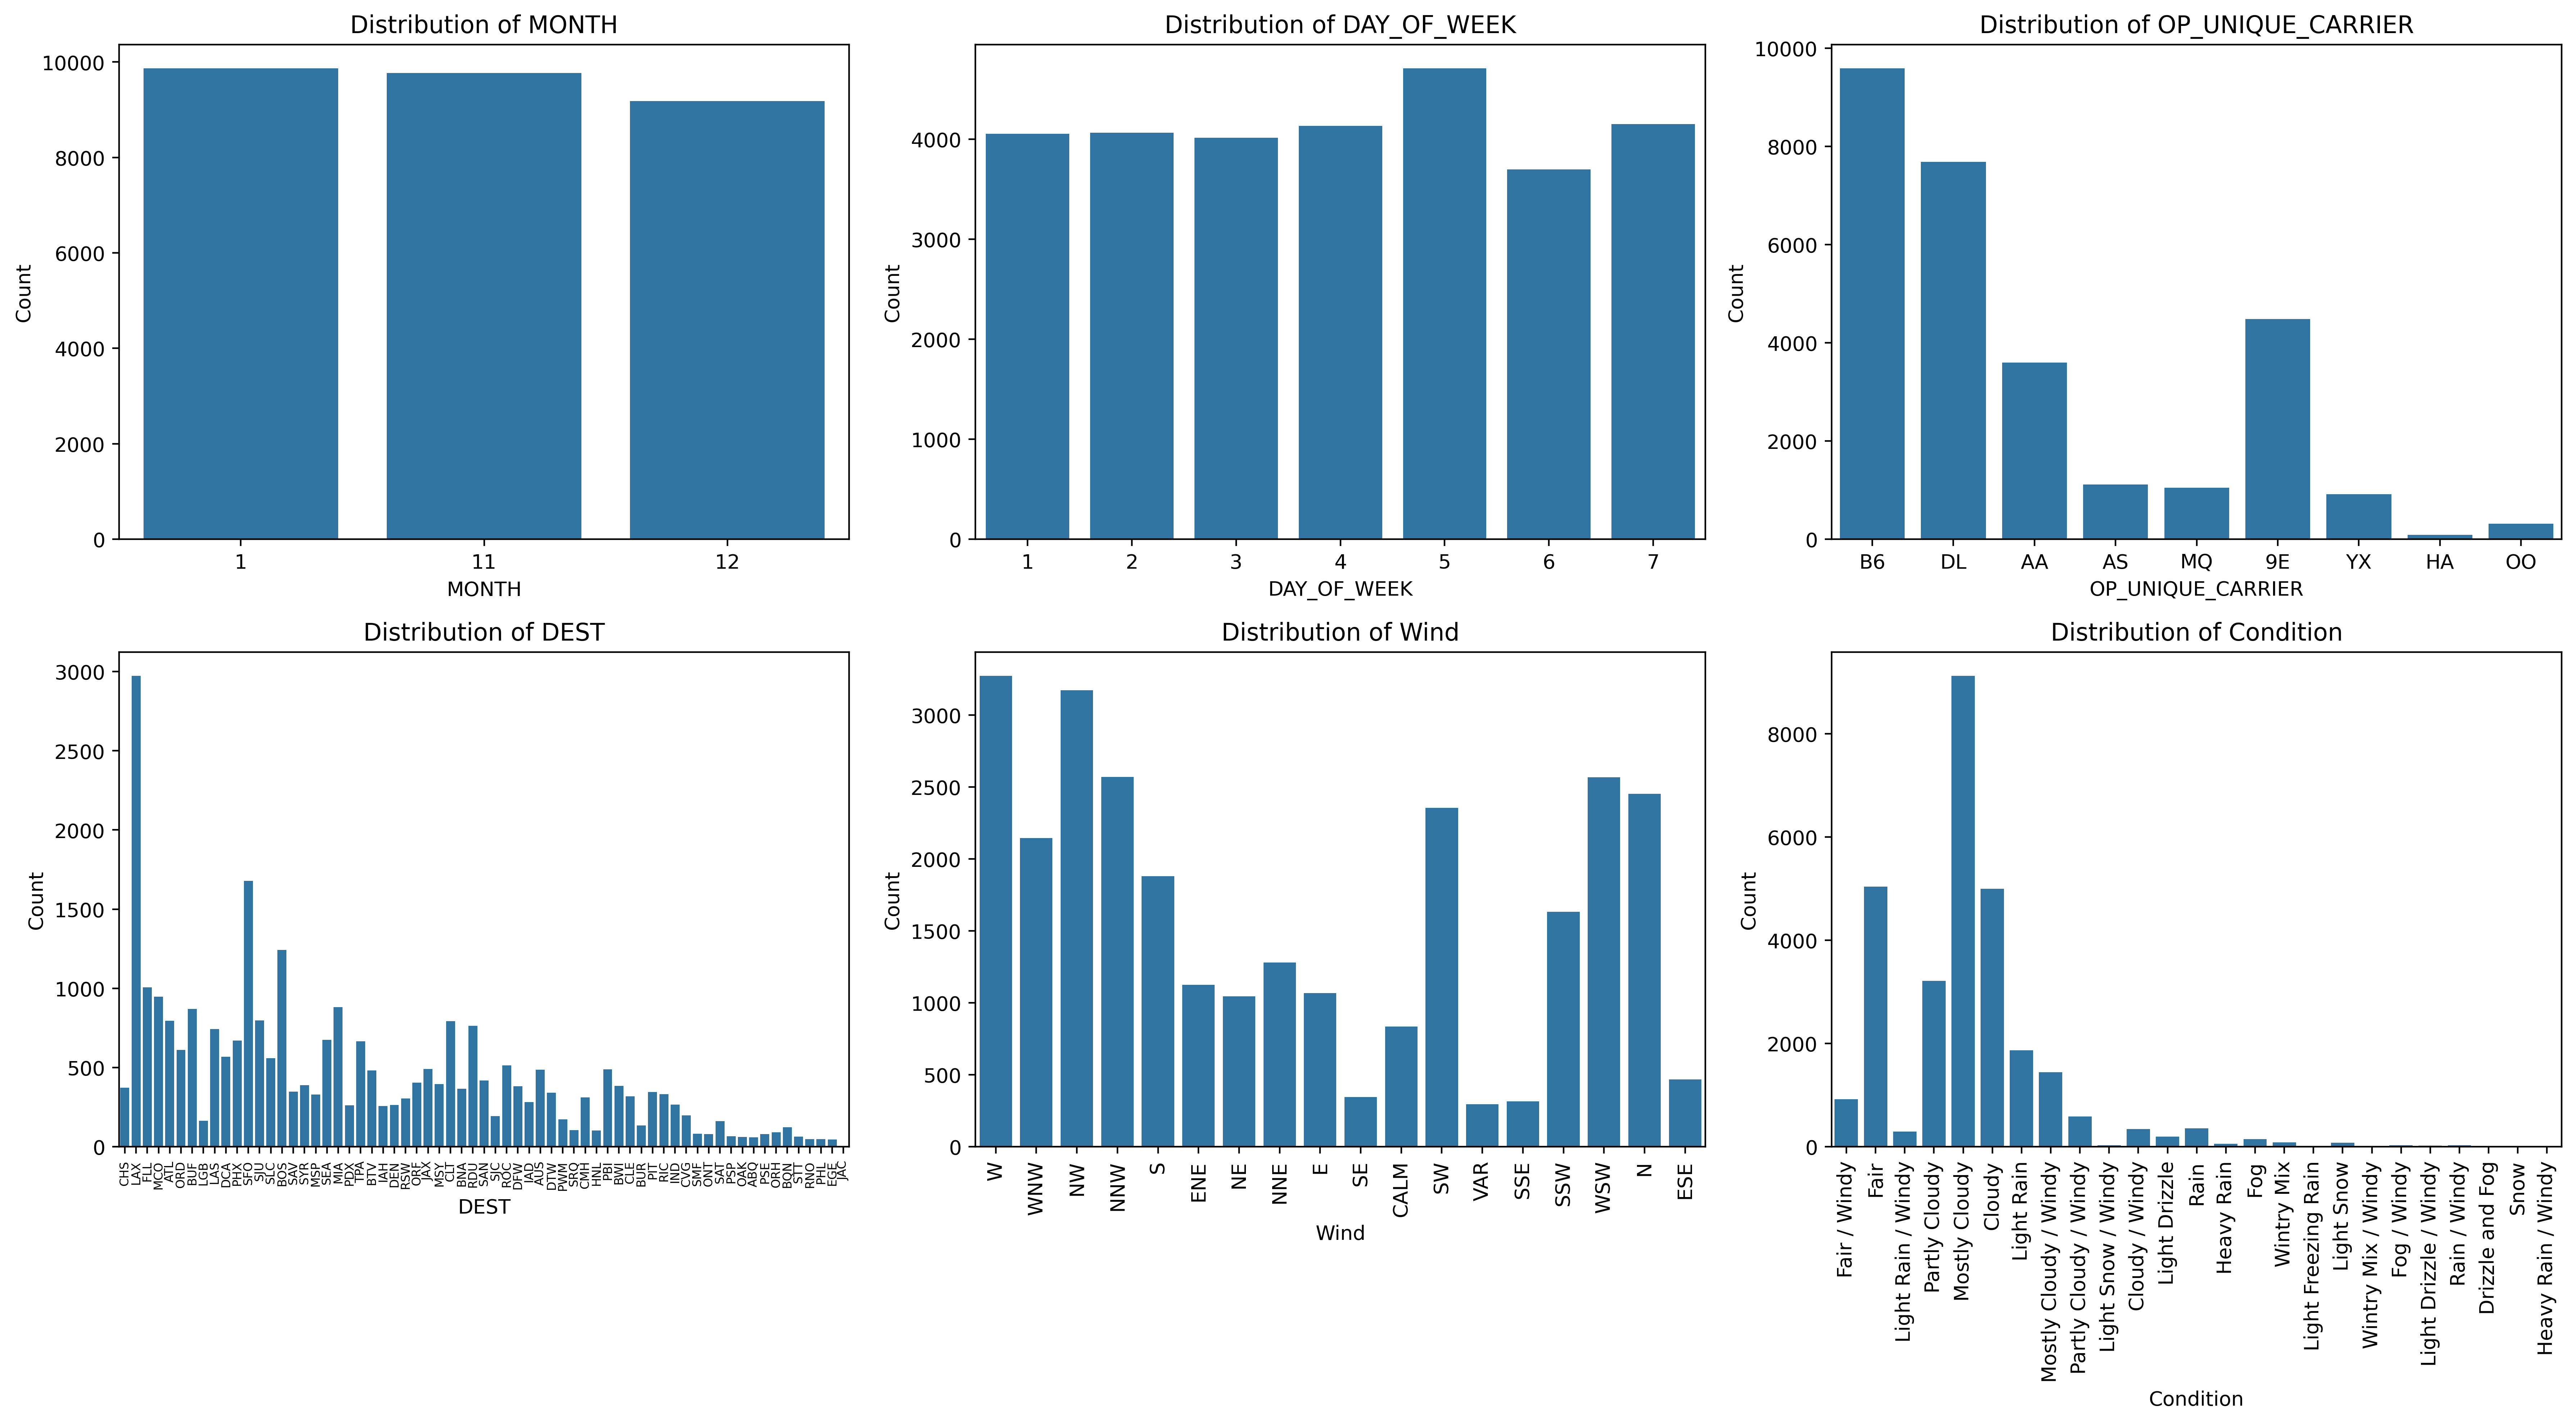

In [16]:
plt.figure(figsize=(18, 10), dpi=400)
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    if col in ['Condition', 'Wind', 'DEST']:
        plt.xticks(rotation=90)
    if col == 'DEST':
        plt.xticks(fontsize=6)
    plt.xlabel(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

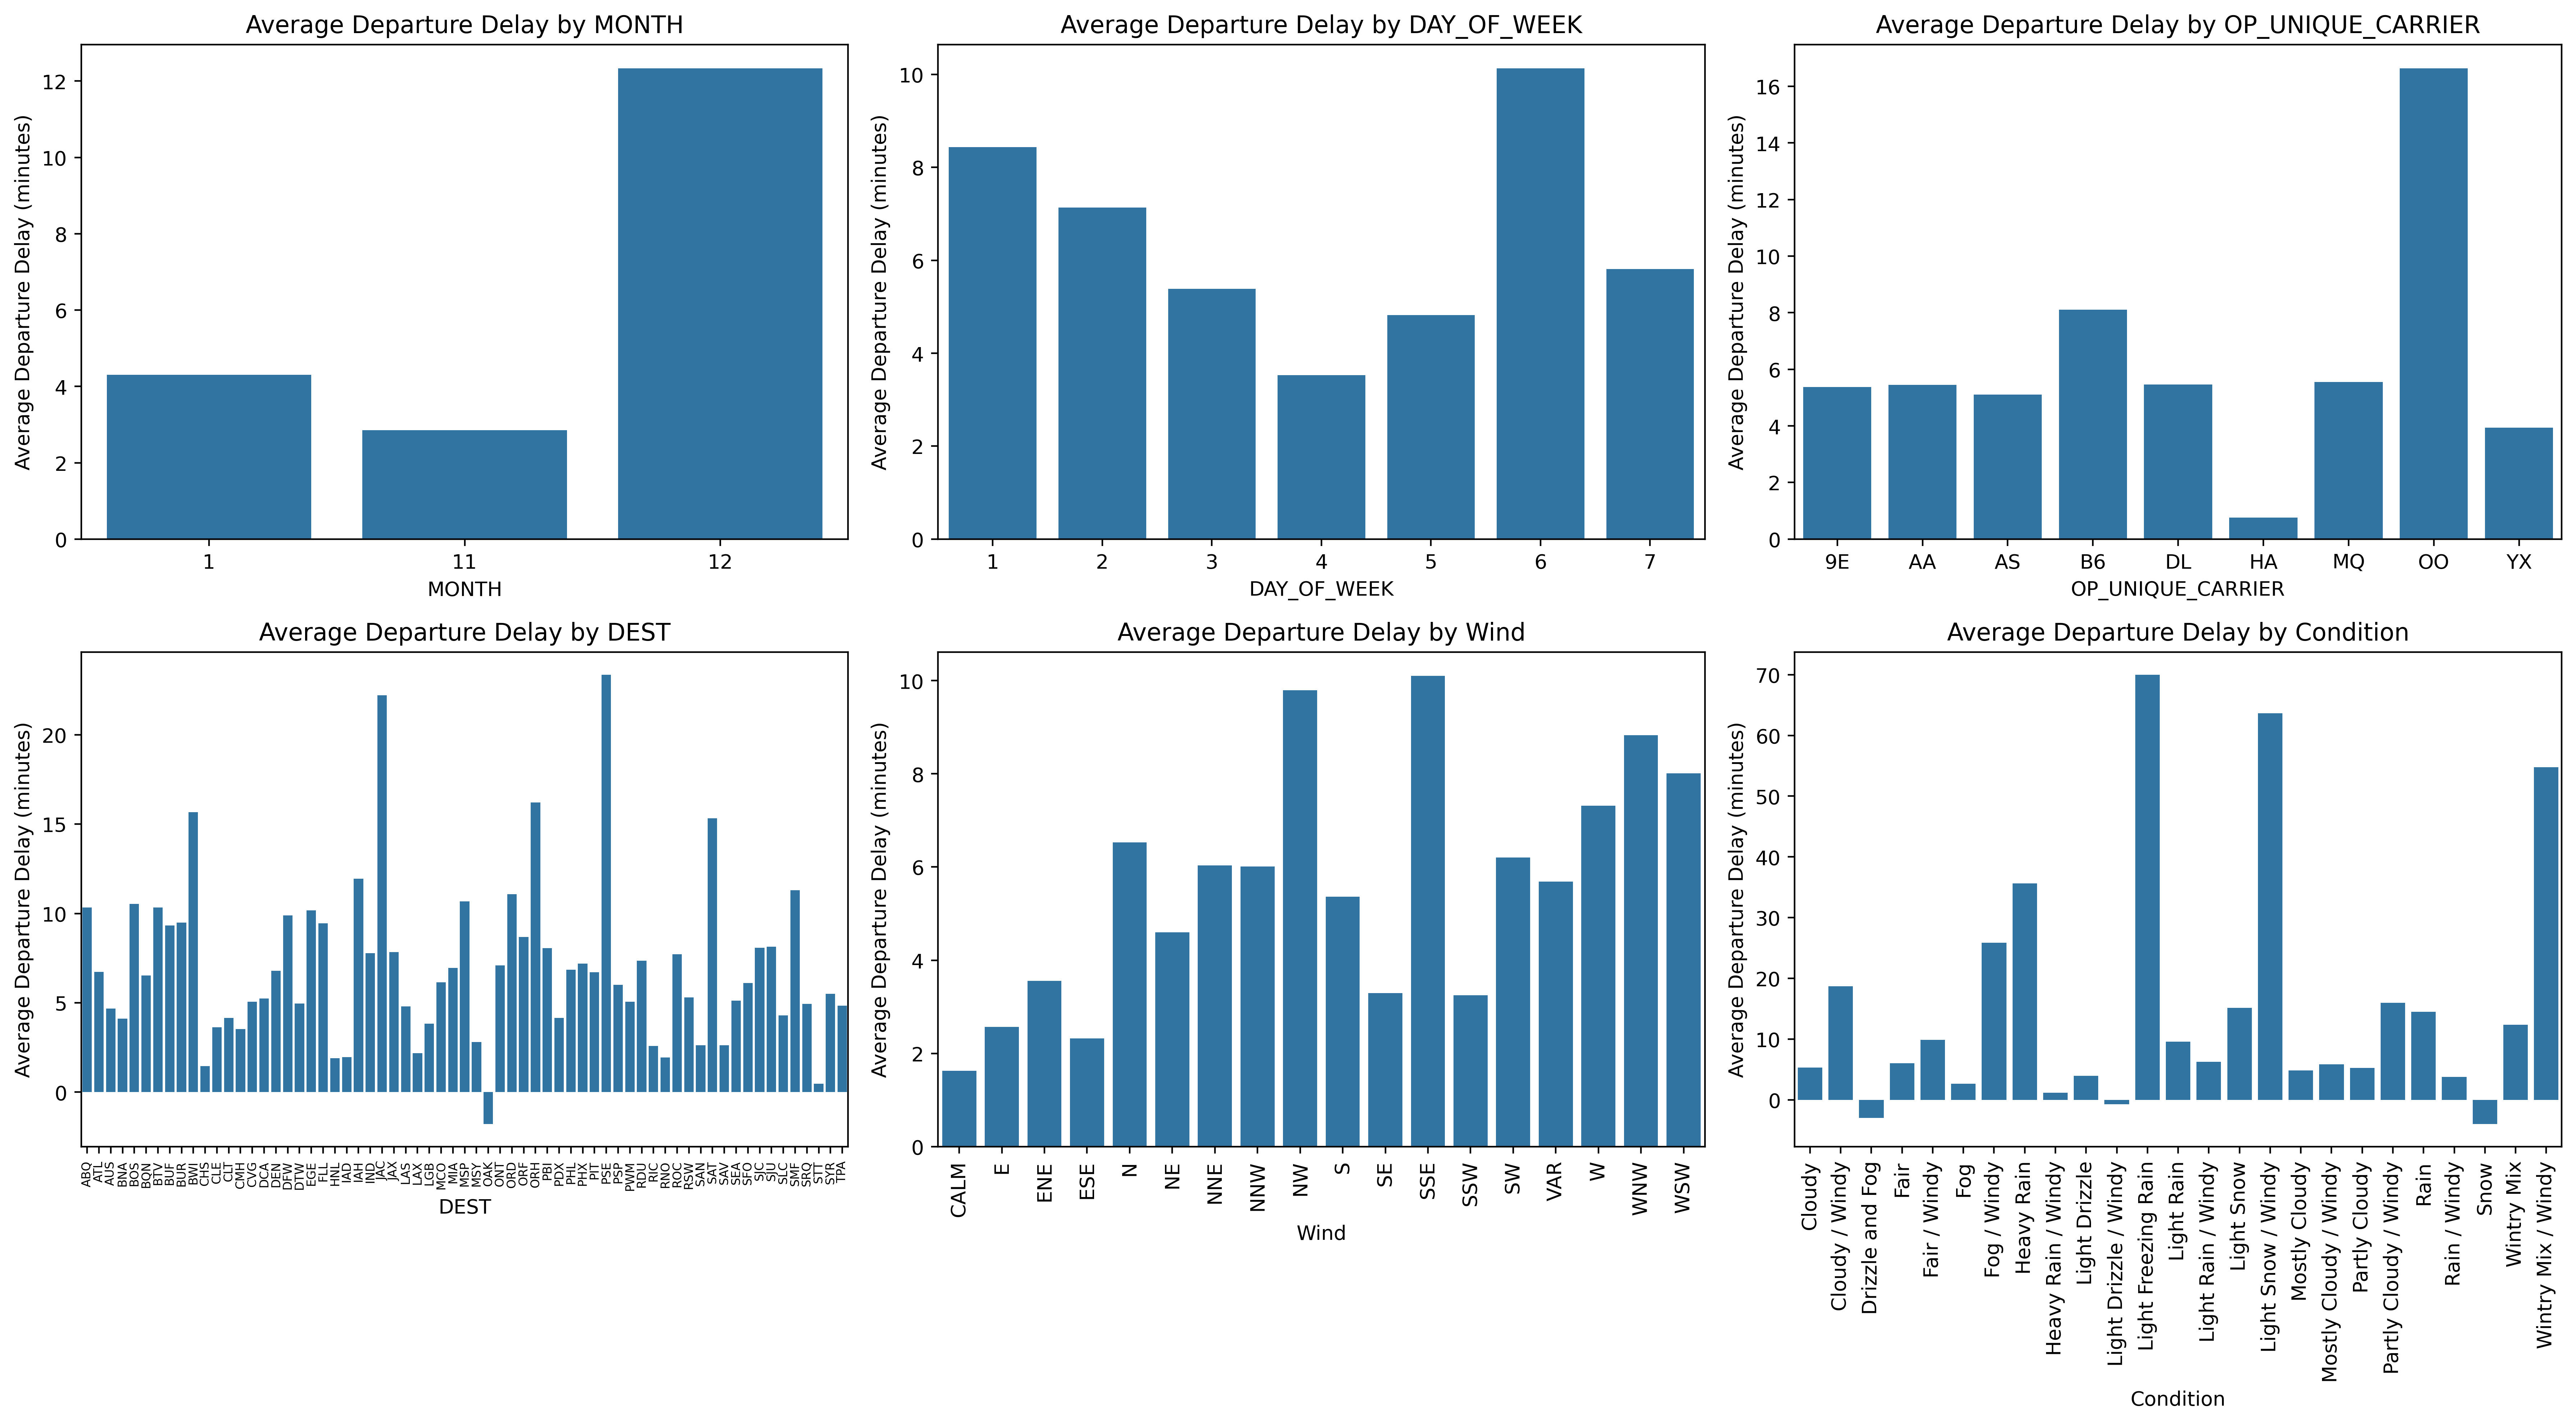

In [17]:
# Average Departure Delay by Category
plt.figure(figsize=(18, 10), dpi=400)
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=df, x=col, y='DEP_DELAY', estimator=np.mean, order=sorted(df[col].unique()), errorbar=None)
    plt.title(f'Average Departure Delay by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Departure Delay (minutes)')
    if col in ['Condition', 'Wind', 'DEST']:
        plt.xticks(rotation=90)
    if col == 'DEST':
        plt.xticks(fontsize=6)
    
plt.tight_layout()
plt.show()

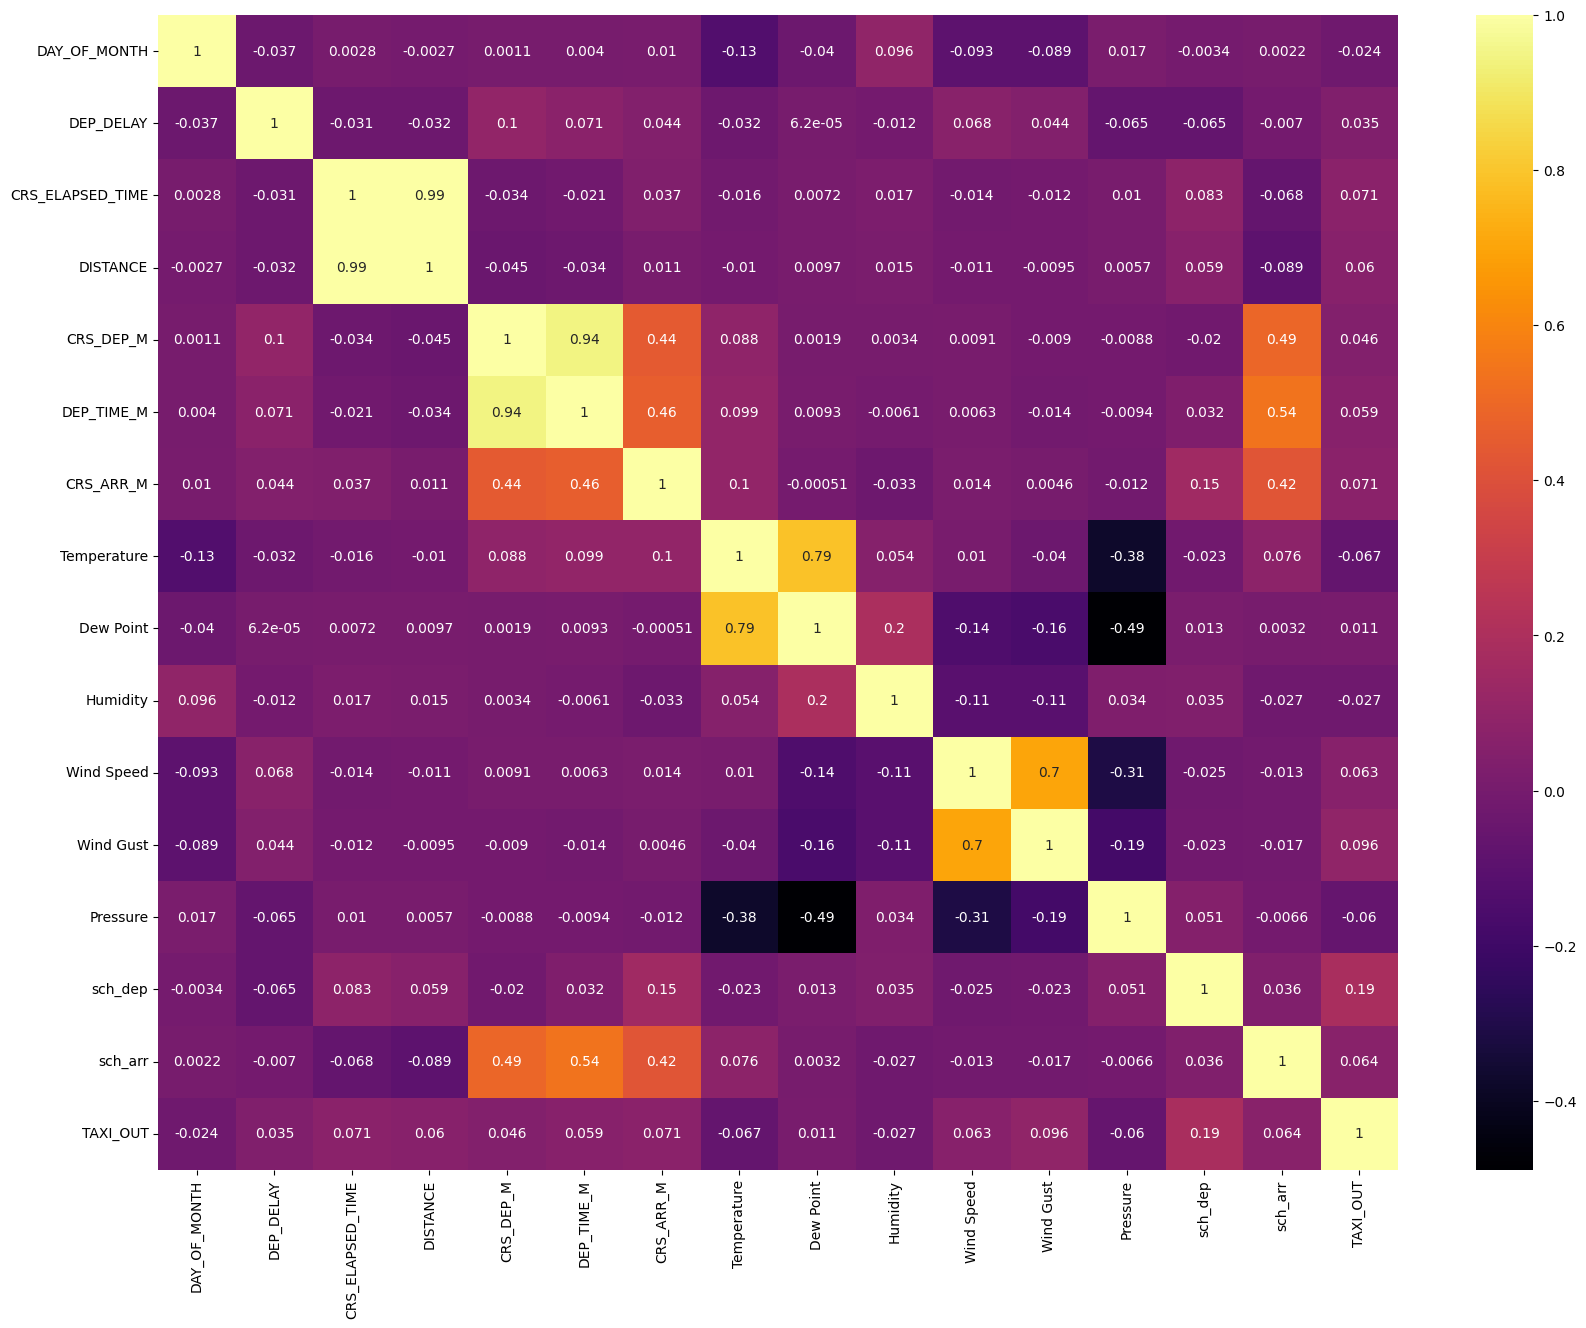

In [18]:
df_numeric = df[numerical_cols].copy()

plt.figure(figsize=(20, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='inferno')
plt.show()

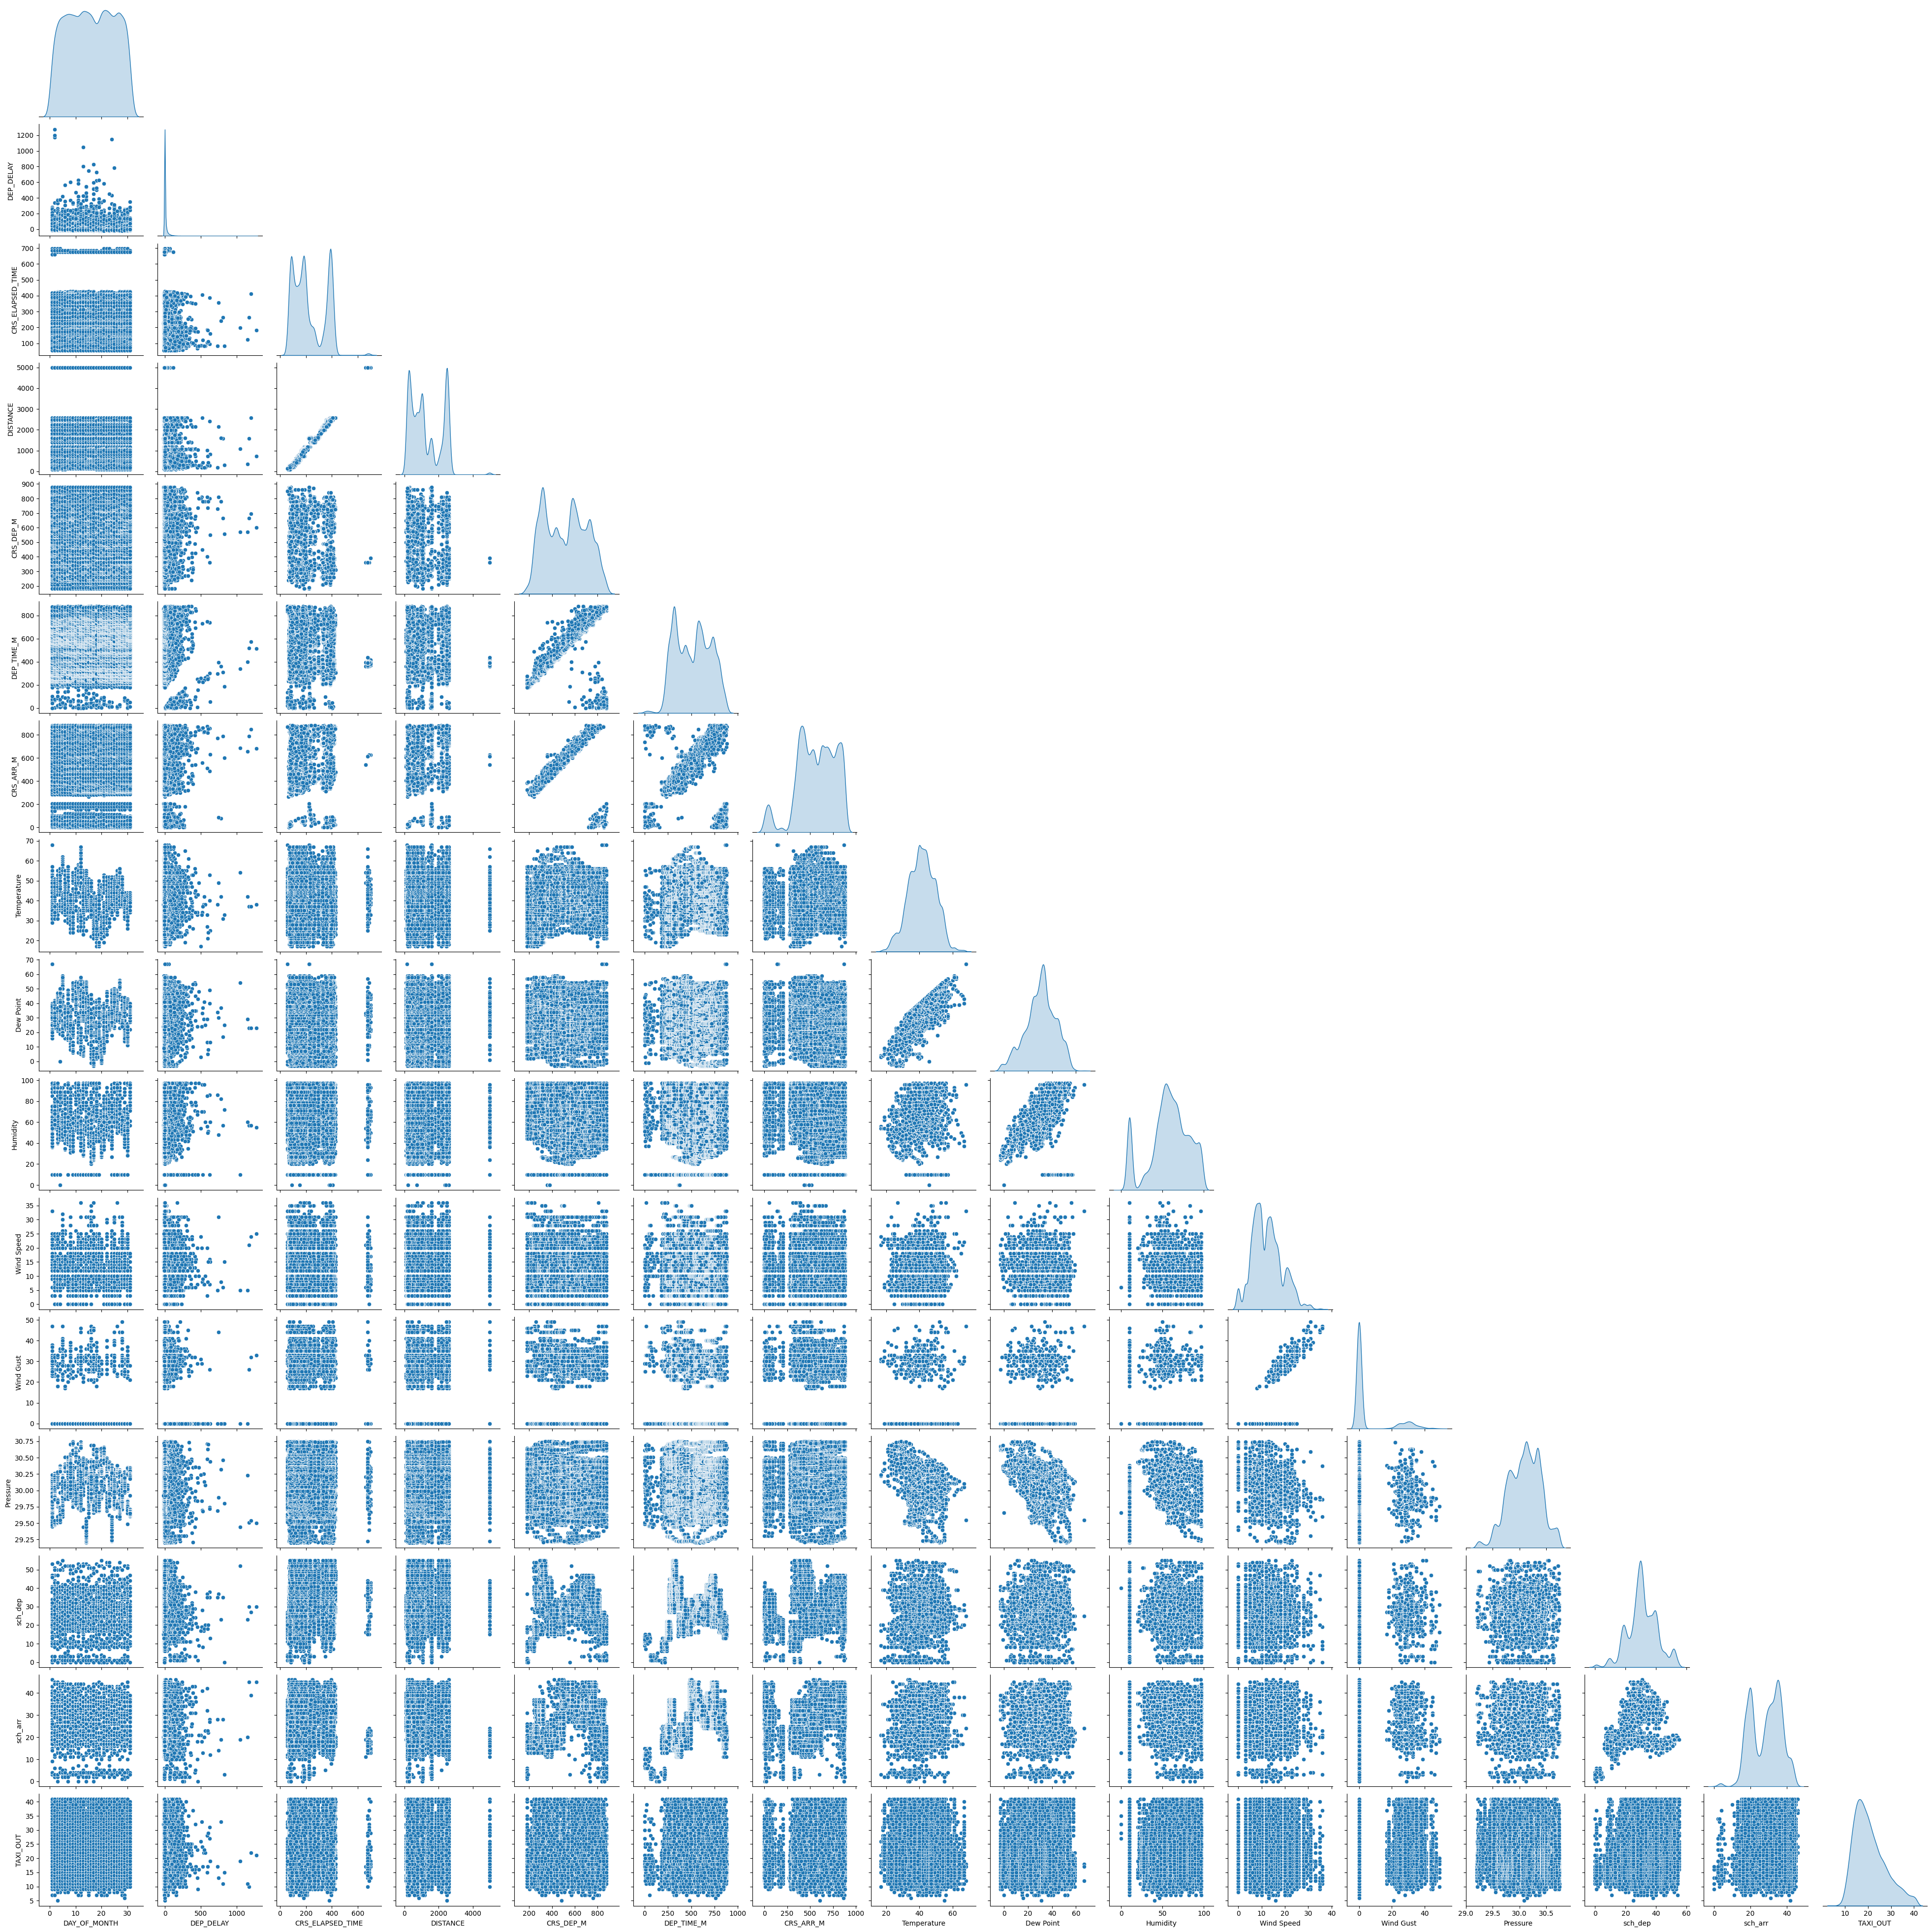

In [19]:
sns.pairplot(df, x_vars=numerical_cols, y_vars=numerical_cols, diag_kind='kde', markers='o', corner=True)
plt.show()

## 4. Preprocessing

### Outliers Removal (Tuckey Fences)

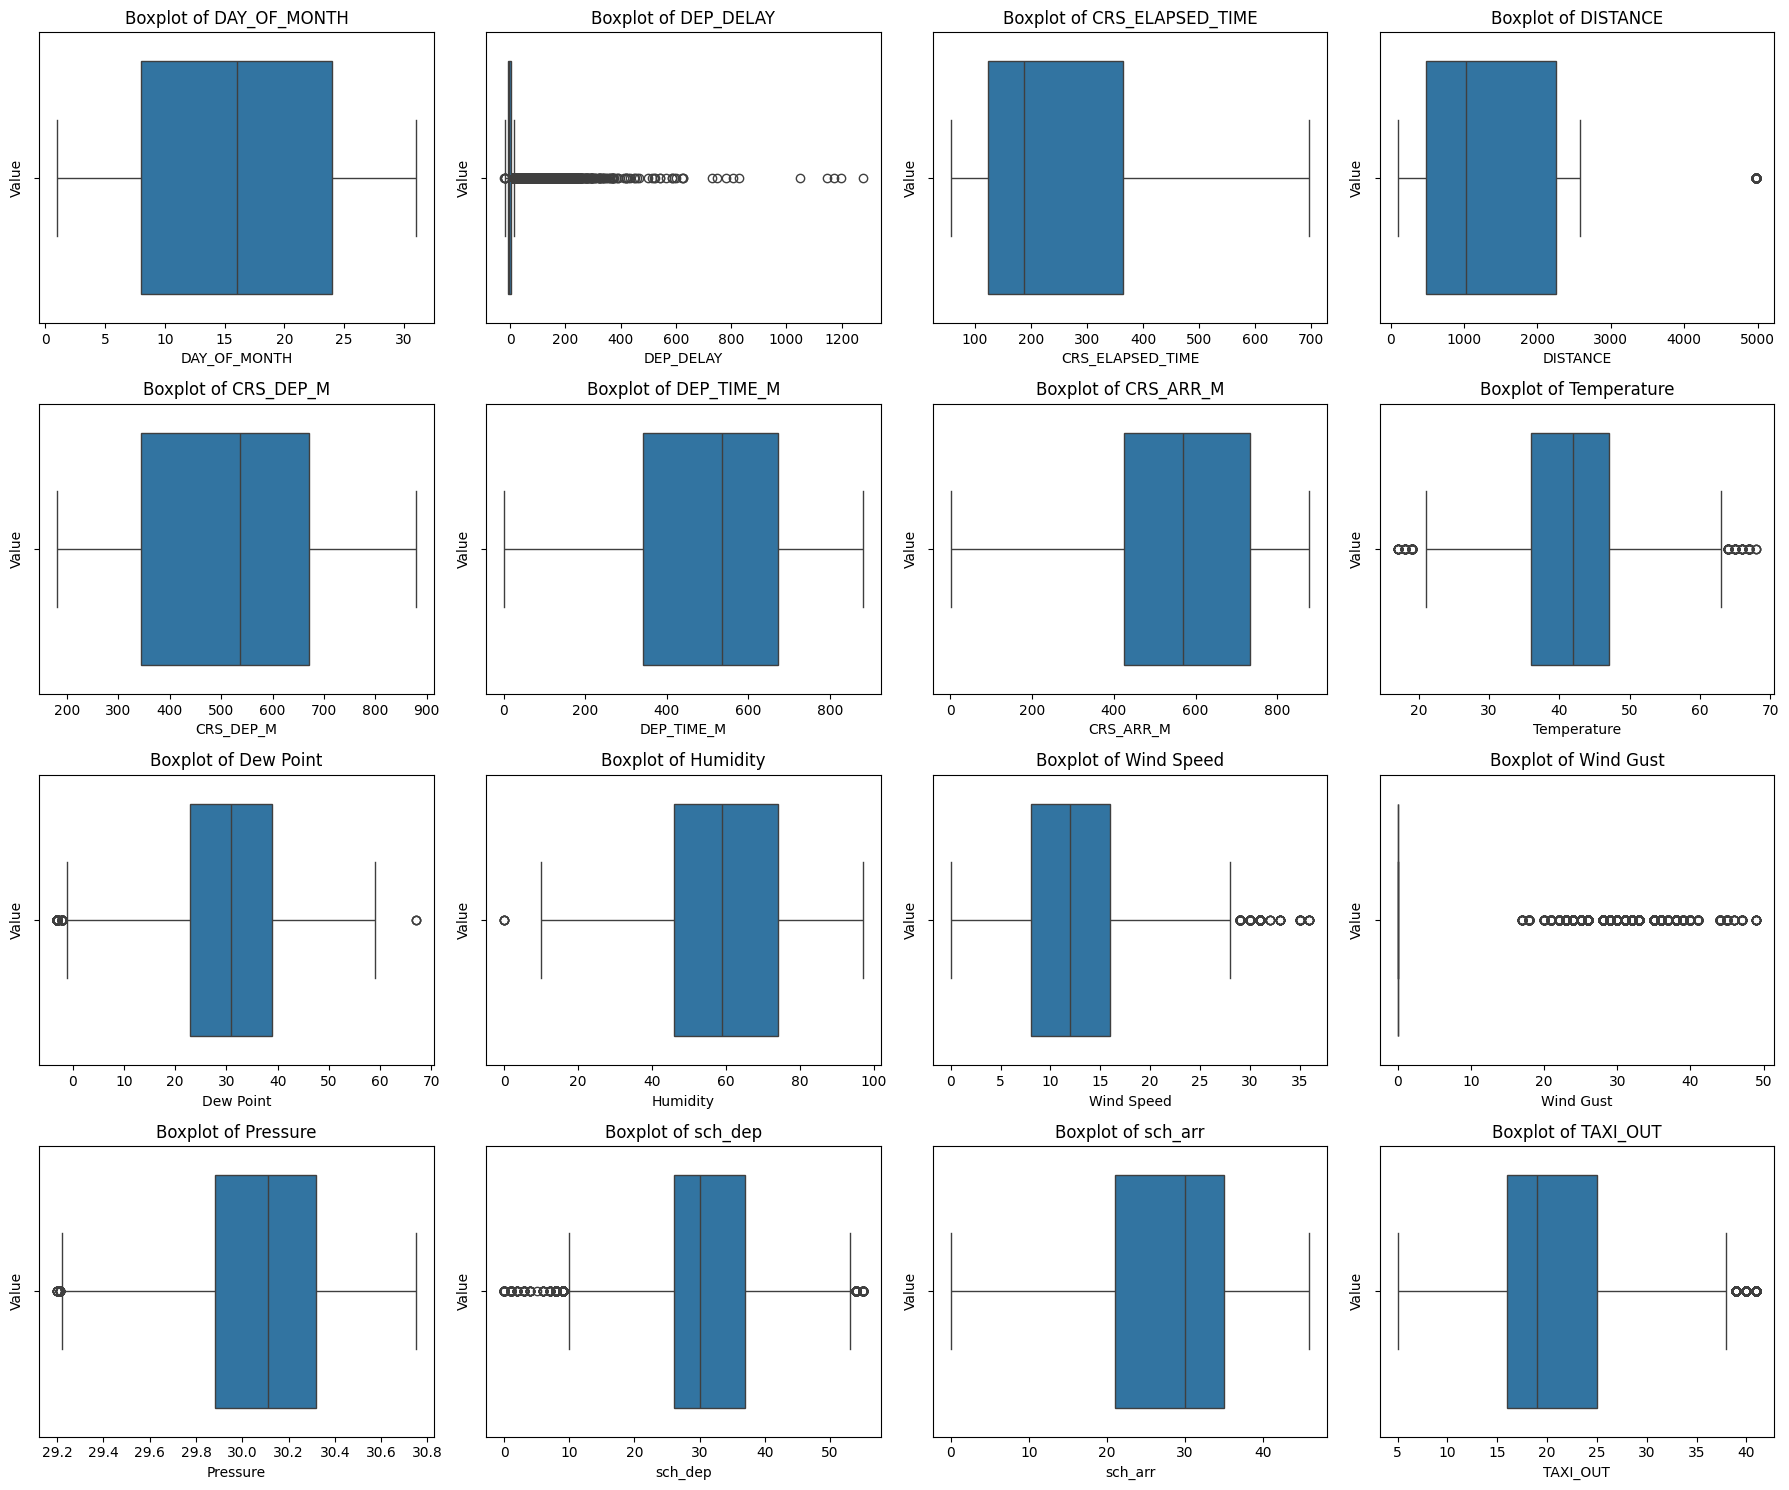

In [20]:
# # Visualizing the distribution of numerical features (boxplot)
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [21]:
def remove_outliers_tukey(df, column):
    """Removes outliers using Tukey's Fences method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

In [22]:
# Apply to all numerical features
for col in numerical_cols:
    df = remove_outliers_tukey(df, col)
    
print(f"Data size after outlier removal: {df.shape}")

Data size after outlier removal: (19367, 22)


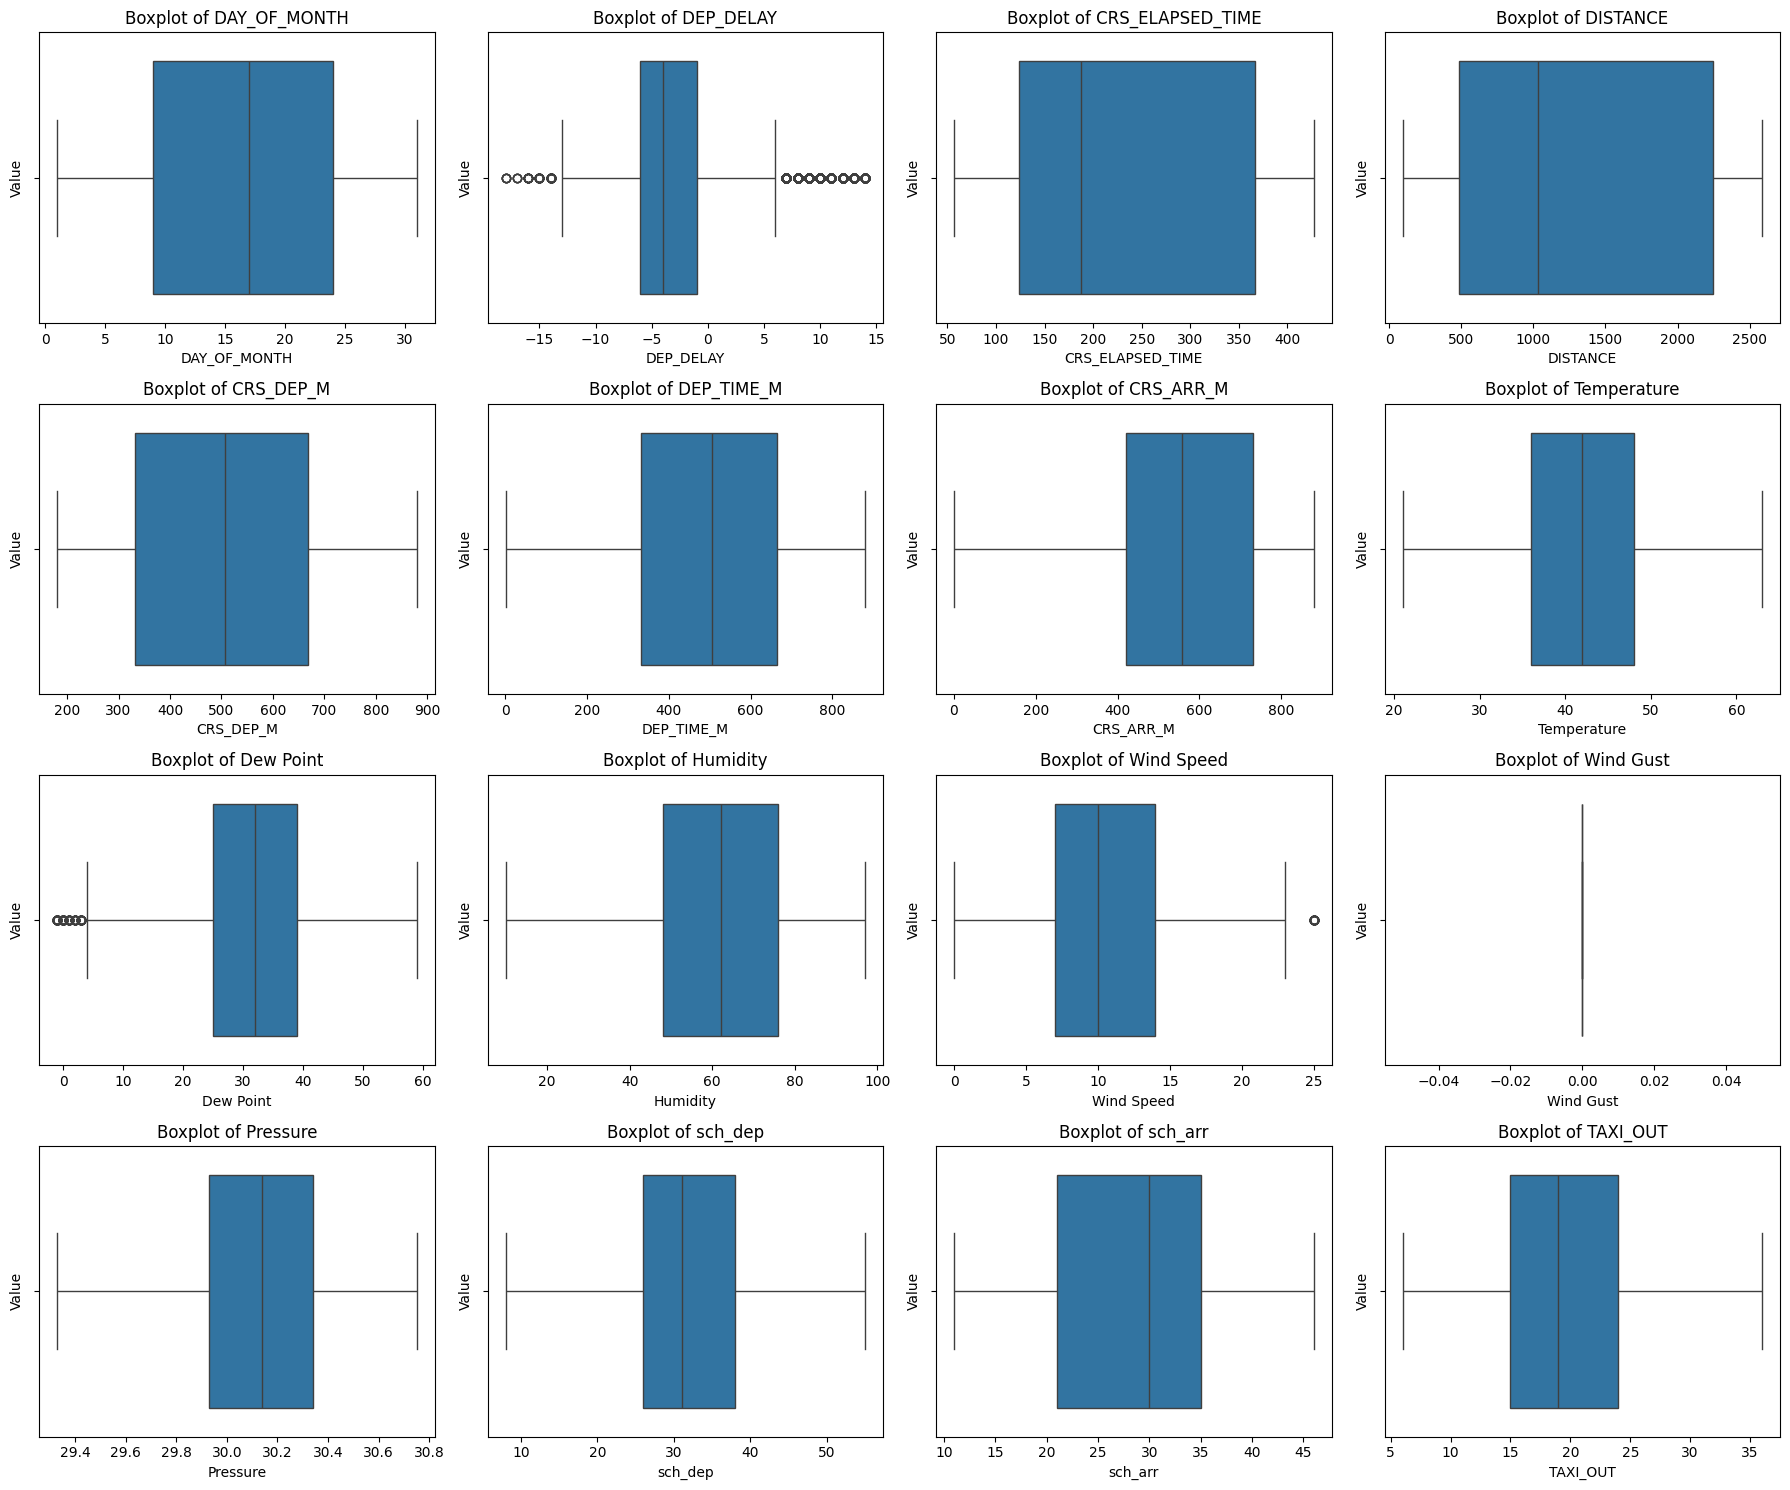

In [23]:
# # Visualizing the distribution of numerical features (boxplot)
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

### Encoding & Scaling

In [24]:
categorical_cols

['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']

In [25]:
# Label Encoding for categorical features
enc = LabelEncoder()

for col in categorical_cols:
    uniques = df[col].unique()
    df[col] = enc.fit_transform(df[col])
    transformed_uniques = enc.transform(uniques)
    print(uniques, ":", transformed_uniques)

[11 12  1] : [1 2 0]
[5 6 7 1 2 3 4] : [4 5 6 0 1 2 3]
['9E' 'DL' 'OO' 'MQ' 'YX' 'B6' 'AA' 'AS'] : [0 4 6 5 7 3 1 2]
['SAV' 'IAH' 'LAS' 'DCA' 'MIA' 'IND' 'CMH' 'ORF' 'SFO' 'MCO' 'BOS' 'LAX'
 'FLL' 'TPA' 'ATL' 'SLC' 'ORD' 'MSY' 'CVG' 'SAN' 'RDU' 'BUF' 'RSW' 'DTW'
 'LGB' 'SEA' 'PHX' 'PDX' 'SJC' 'ONT' 'BNA' 'DFW' 'SAT' 'PSP' 'AUS' 'OAK'
 'CLT' 'CLE' 'MSP' 'JAX' 'ABQ' 'SJU' 'PBI' 'PIT' 'PSE' 'SYR' 'IAD' 'BWI'
 'ROC' 'PWM' 'BTV' 'CHS' 'DEN' 'STT' 'SRQ' 'RIC' 'BUR' 'SMF' 'ORH' 'BQN'
 'RNO' 'PHL' 'EGE' 'JAC'] : [53 22 26 15 30 23 13 36 55 29  4 27 20 63  1 58 35 32 14 51 46  7 50 18
 28 54 41 39 56 34  3 17 52 44  2 33 12 11 31 25  0 57 38 42 43 62 21  9
 49 45  6 10 16 61 60 47  8 59 37  5 48 40 19 24]
['W' 'WNW' 'NW' 'NNW' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR' 'SSE'
 'S' 'SSW' 'WSW' 'N' 'ESE'] : [15 16  8  7  2  5  6  1 10  0 13 14 11  9 12 17  4  3]
['Fair' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Light Rain'
 'Fair / Windy' 'Mostly Cloudy / Windy' 'Cloudy / Windy' 'Light Drizzle'
 

In [26]:
# Splitting the data into training and testing sets
X = df.drop(columns=['DEP_DELAY'])
y = df["DEP_DELAY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols_train = numerical_cols.copy()
numerical_cols_train.remove("DEP_DELAY")

# Scaling the data
scaler = StandardScaler()
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
X_test[numerical_cols_train] = scaler.transform(X_test[numerical_cols_train])

### Principal Component Analysis (PCA)

In [27]:
# Fit PCA Only on Training Data
pca = PCA(n_components='mle')
X_train_pca = pca.fit_transform(X_train)

# Transform Test Data Using the Same PCA
X_test_pca = pca.transform(X_test)

# Check Shapes
print(f"Original train shape: {X_train.shape} → PCA shape: {X_train_pca.shape}")
print(f"Original test shape:  {X_test.shape}  → PCA shape: {X_test_pca.shape}")

Original train shape: (15493, 21) → PCA shape: (15493, 20)
Original test shape:  (3874, 21)  → PCA shape: (3874, 20)


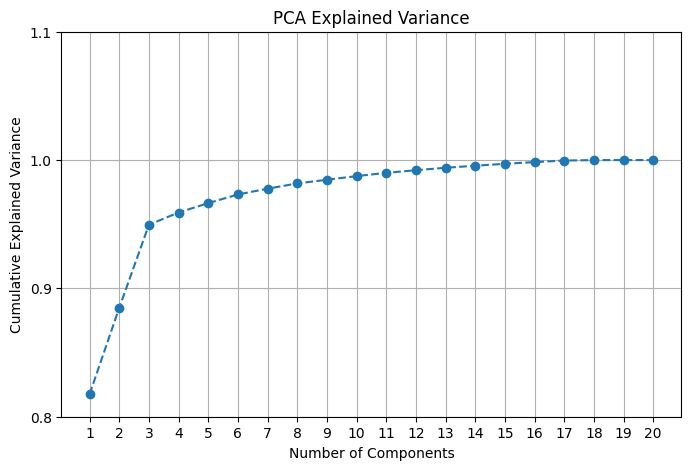

In [28]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, X_test_pca.shape[1] + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xticks(range(1, X_train_pca.shape[1] + 1))
plt.yticks(np.arange(0.8, 1.1, 0.1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [29]:
np.cumsum(explained_variance)

array([0.81749992, 0.8848634 , 0.94958059, 0.95912885, 0.96644082,
       0.9731844 , 0.97766681, 0.98177566, 0.98466237, 0.98748316,
       0.99003506, 0.99209459, 0.99399349, 0.99557149, 0.99708746,
       0.99841745, 0.99961769, 0.99997423, 0.99998975, 1.        ])

## 5. Models

### Linear Regression

In [30]:
lr = LR()
lr.fit(X_train_pca, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test_pca)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE:        {mae:.4f}")
print(f"MSE:        {mse:.4f}")
print(f"RMSE:       {rmse:.4f}")
print(f"R2-Score:   {r2:.4f}")

MAE:        3.4622
MSE:        22.9459
RMSE:       4.7902
R2-Score:   0.0681


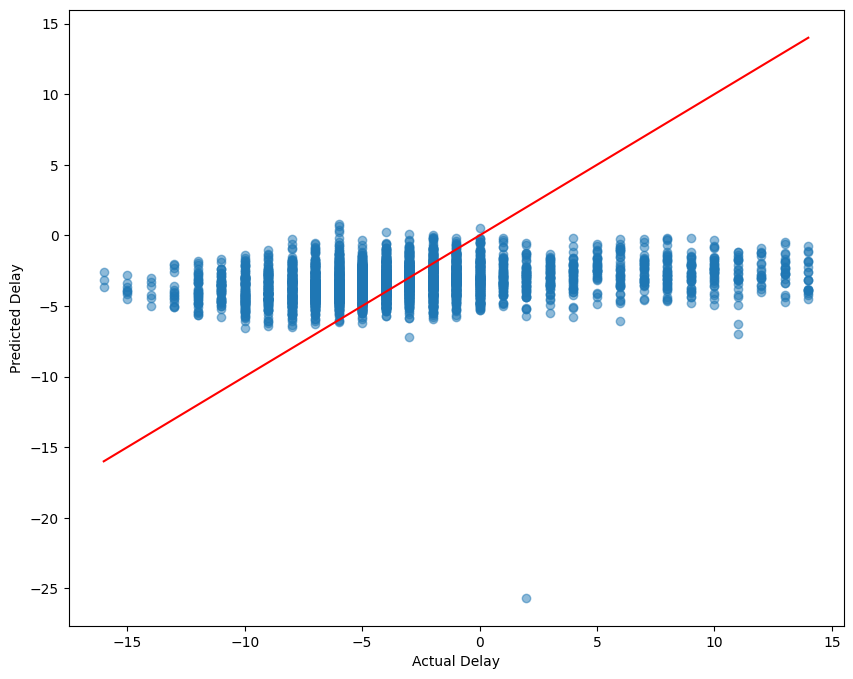

In [32]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

### Random Forest Regression (RFR)

In [33]:
rfr = RFR(n_estimators=100)
rfr.fit(X_train_pca, y_train)

RandomForestRegressor()

In [34]:
y_pred = rfr.predict(X_test_pca)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE:        {mae:.4f}")
print(f"MSE:        {mse:.4f}")
print(f"RMSE:       {rmse:.4f}")
print(f"R2-Score:   {r2:.4f}")

MAE:        0.7578
MSE:        1.0195
RMSE:       1.0097
R2-Score:   0.9586


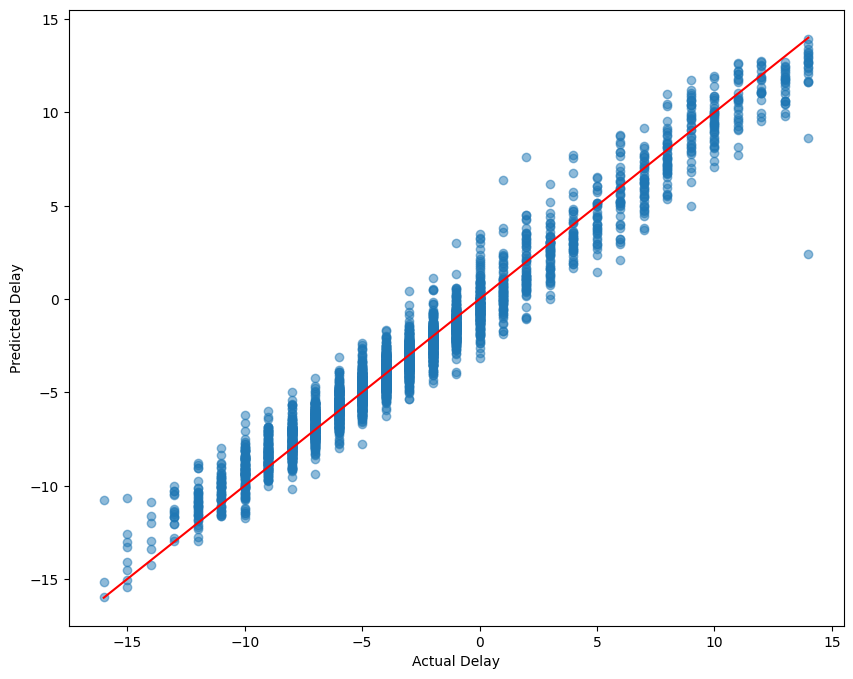

In [35]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

### Artificial Neural Network (ANN)

In [36]:
ann = Sequential([
    Input((X_train_pca.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to prevent overfitting

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')
])

ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,225 (94.63 KB)

 Trainable params: 23,553 (92.00 KB)

 Non-trainable params: 672 (2.62 KB)

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True)
ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = ann.fit(X_train_pca, y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 34.3366 - mae: 4.8480 - val_loss: 27.2791 - val_mae: 4.0994
Epoch 2/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.3010 - mae: 3.9662 - val_loss: 24.9976 - val_mae: 3.7686
Epoch 3/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.7966 - mae: 3.7889 - val_loss: 24.3135 - val_mae: 3.6521
Epoch 4/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.1772 - mae: 3.7178 - val_loss: 24.1381 - val_mae: 3.6200
Epoch 5/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.3182 - mae: 3.6616 - val_loss: 23.9421 - val_mae: 3.6245
Epoch 6/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.9300 - mae: 3.6447 - val_loss: 23.8047 - val_mae: 3.6006
Epoch 7/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.5969 - mae: 3.6799 - val_loss: 23.7226 - val_mae: 3.6143
Epoch 8/500
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.8847 - mae: 3.6017 - val_loss: 23.5007 - val_mae: 3.5732
Epoch 9/500
388/388 ━━━━━━━━━━━━

2 minutes

In [38]:
y_pred = ann.predict(X_test_pca)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE:        {mae:.4f}")
print(f"MSE:        {mse:.4f}")
print(f"RMSE:       {rmse:.4f}")
print(f"R2-Score:   {r2:.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAE:        1.0344
MSE:        5.0704
RMSE:       2.2518
R2-Score:   0.7941


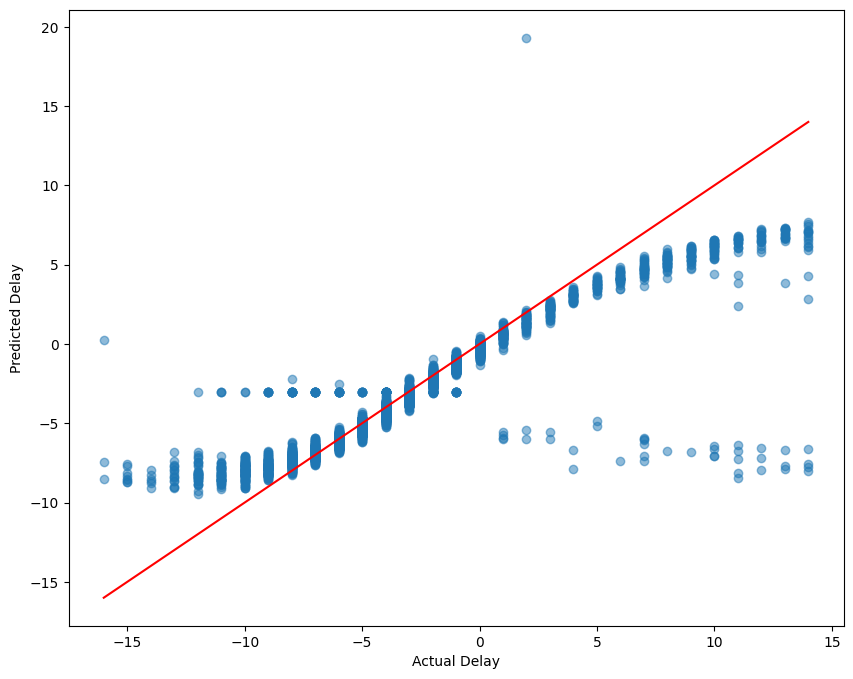

In [39]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

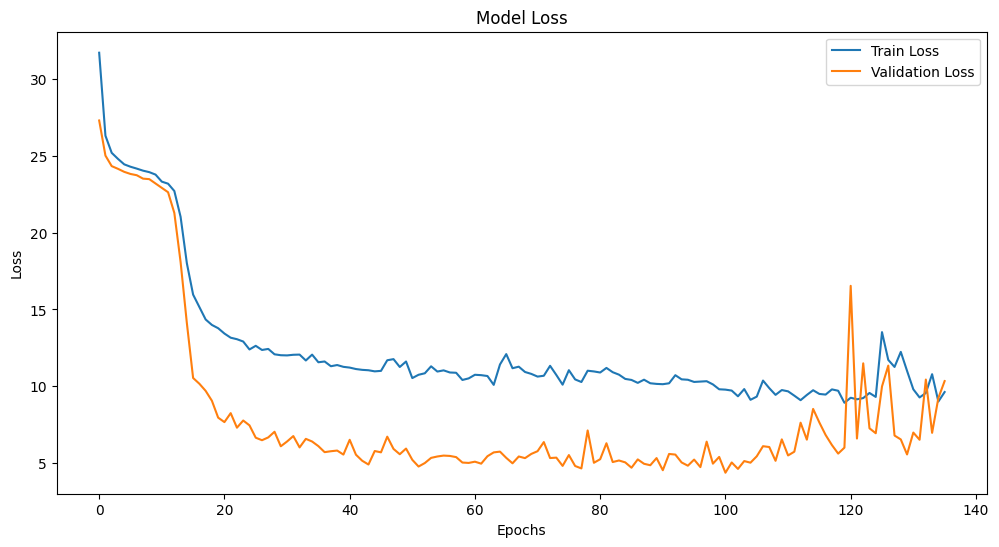

In [40]:
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Extreme Gradient Boosting Regressor (XGBR)

In [41]:
# Initialize the XGBRegressor model
xgbr = XGBR(n_estimators=1000, learning_rate=0.05, random_state=42, validate_parameters=True)

# Train the model using PCA-transformed training data
xgbr.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
y_pred = xgbr.predict(X_test_pca)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE:        {mae:.4f}")
print(f"MSE:        {mse:.4f}")
print(f"RMSE:       {rmse:.4f}")
print(f"R2-Score:   {r2:.4f}")

MAE:        0.3813
MSE:        0.5700
RMSE:       0.7550
R2-Score:   0.9768


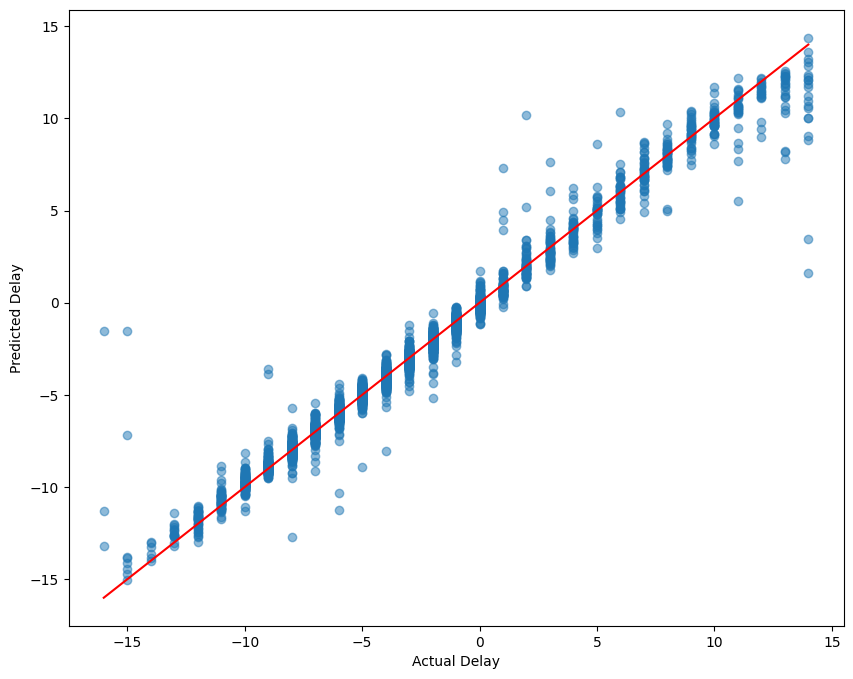

In [43]:
# Scatter Plot between Predicted and Actual Prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()

In [ ]:
# Creating a n_estimators vs accuracy plot
mse_values = []
for i in range(1, 501):
    model = XGBR(n_estimators=i, learning_rate=0.05, random_state=42, validate_parameters=True)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse_values.append(mean_squared_error(y_test, y_pred))

7.5 minutes

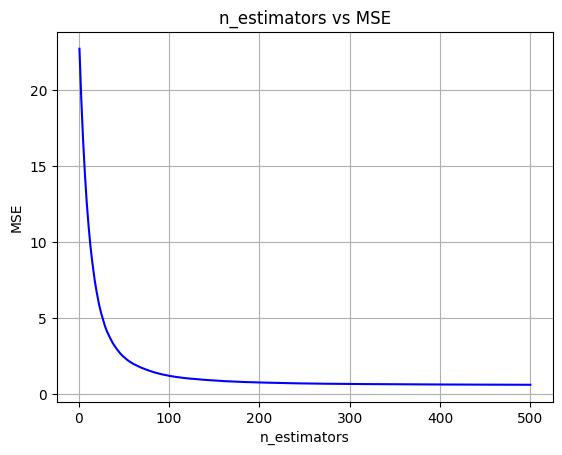

In [ ]:
sns.lineplot(x=range(1, 501), y=mse_values, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('n_estimators vs MSE')
plt.grid()
plt.show()

## Results Summary

In [44]:
Model_Names = ['Linear Regression', 'Random Forest Regressor', 'ANN', 'XGBoost Regressor']

R2_vals = [r2_score(y_test, model.predict(X_test_pca)) for model in [lr, rfr, ann, xgbr]]
RMSE_vals = [root_mean_squared_error(y_test, model.predict(X_test_pca)) for model in [lr, rfr, ann, xgbr]]
MSE_vals = [mean_squared_error(y_test, model.predict(X_test_pca)) for model in [lr, rfr, ann, xgbr]]
MAE_vals = [mean_absolute_error(y_test, model.predict(X_test_pca)) for model in [lr, rfr, ann, xgbr]]
Report_DF = pd.DataFrame()

Report_DF['Model Name'] = Model_Names
Report_DF['R2-Score'] = R2_vals
Report_DF['RMSE'] = RMSE_vals
Report_DF['MSE'] = MSE_vals
Report_DF['MAE'] = MAE_vals

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


In [45]:
CM = sns.color_palette("inferno", as_cmap=True)
Report_DF.style.background_gradient(cmap=CM)

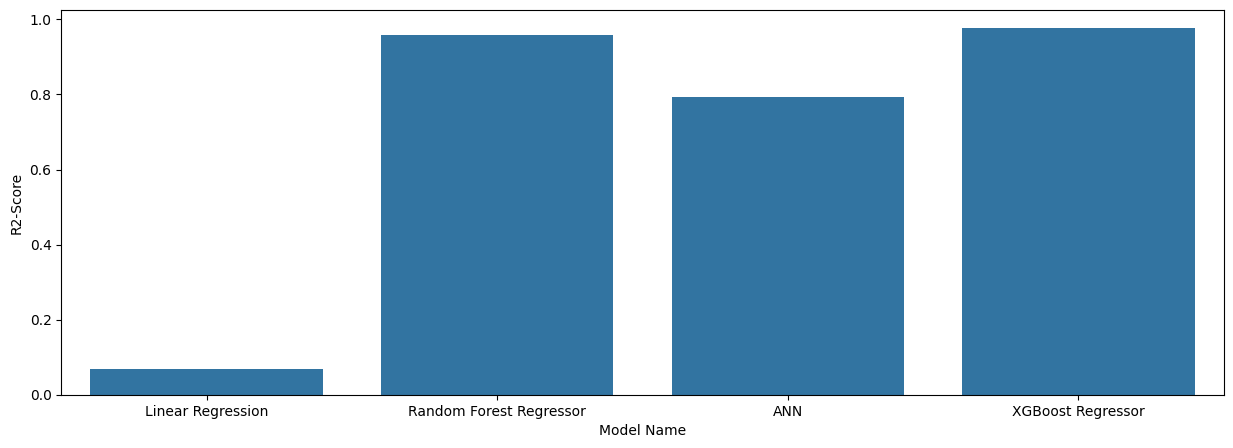

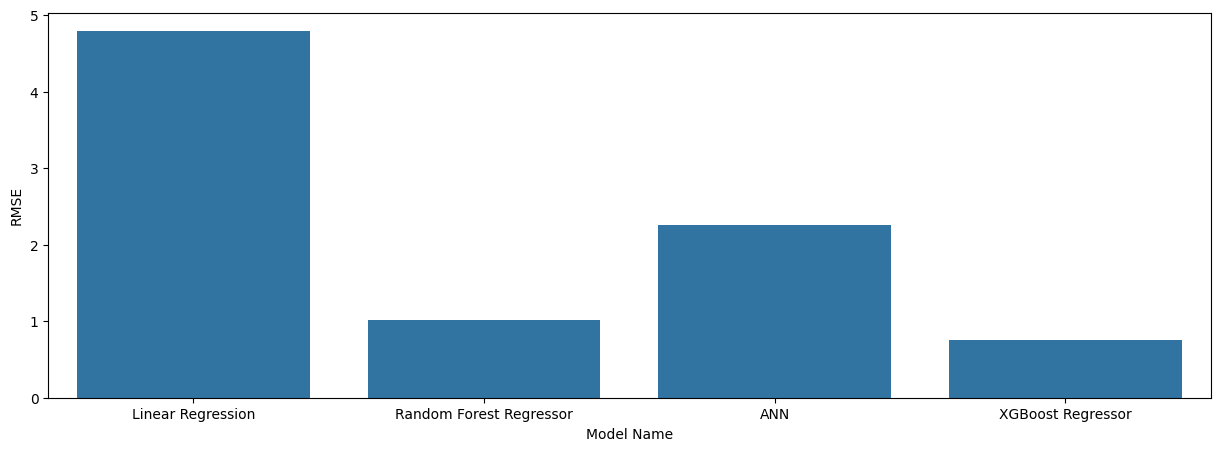

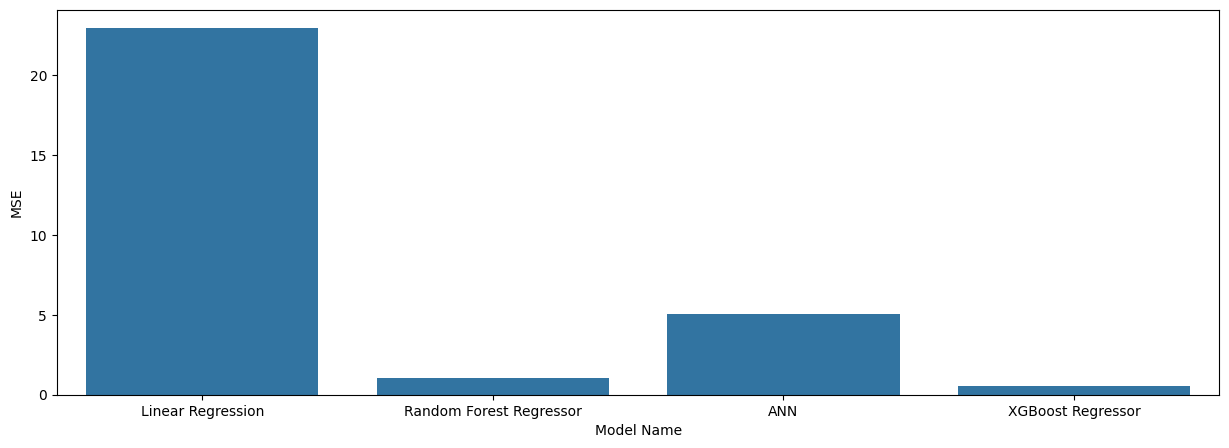

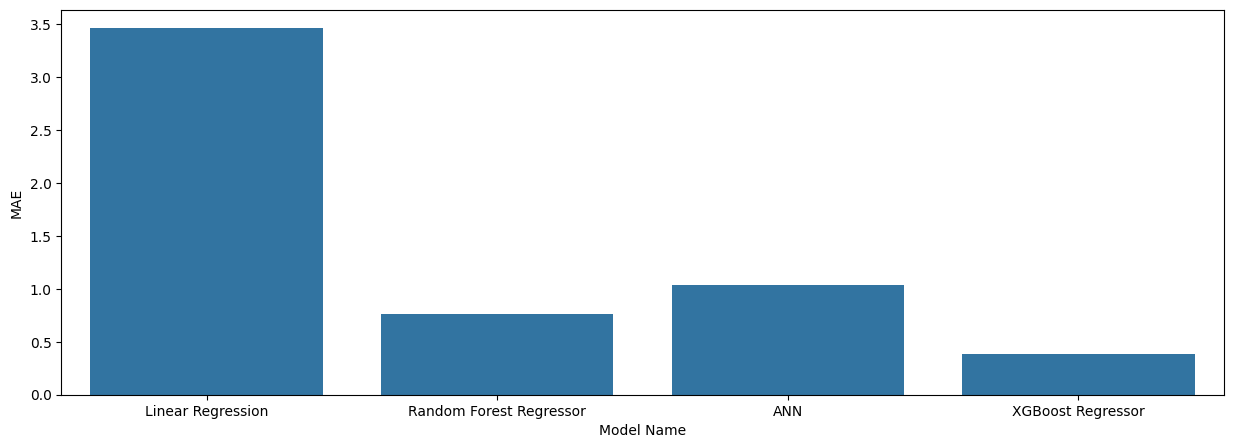

In [46]:
for col in ["R2-Score", "RMSE", "MSE", "MAE"]:
    plt.figure(figsize = (15, 5))
    sns.barplot(x='Model Name', y=col, data=Report_DF, order=Model_Names)
    plt.show()